## Load data

In [11]:
from dataAnalysis.DataAnalysis import DataAnalysis
import pandas as pd

data = pd.read_csv(r"extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data)

/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Training: 
Assessable data are 528101 cases and 1015074 CBCs
Control data are 527038 cases and 1013548 CBCs
Sepsis data are 1488 cases and 1526 CBCs
$$$$$$$$$$$$$$$$$$$$
Testing: 


/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 365794, Sepsis: 490
Assessable data are 180494 cases and 366284 CBCs
Control data are 180157 cases and 365794 CBCs
Sepsis data are 472 cases and 490 CBCs


/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 437629, Sepsis: 448
Assessable data are 157922 cases and 438077 CBCs
Control data are 180157 cases and 437629 CBCs
Sepsis data are 438 cases and 448 CBCs


In [12]:
y_train = data_analysis.get_y_train()
X_train = data_analysis.get_X_train()

y_test = data_analysis.get_y_test()
X_test = data_analysis.get_X_test()

y_gw_test = data_analysis.get_y_gw()
X_gw_test = data_analysis.get_X_gw()

## Metrics definition

In [13]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)

## Logistic regression

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044219  0.776133  0.441226   0.008632  0.836916  0.009453
1  Greifswald  0.022229  0.592021  0.373617   0.003746  0.755808  0.004283


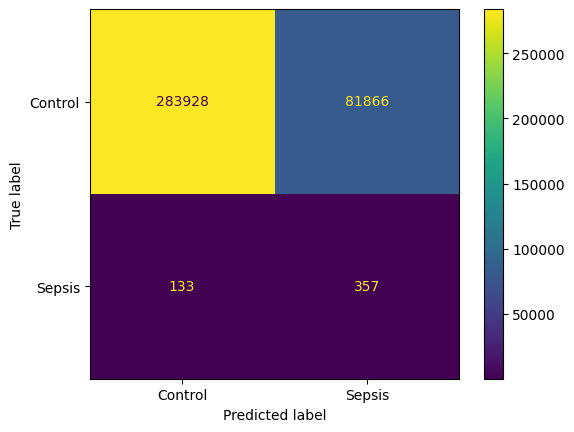

In [4]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(evaluation.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

## Decision Tree

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044252  0.726204  0.424541   0.007894  0.849454  0.009056
1  Greifswald  0.027364  0.631928  0.389278   0.004322  0.787637  0.003666


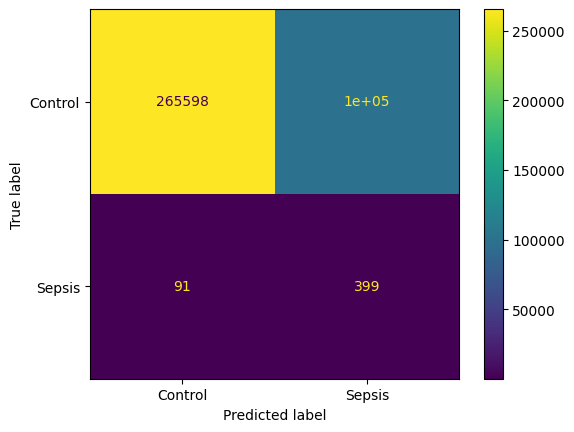

In [5]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(evaluation.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

## Random Forest

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.060415  0.884964  0.476824   0.014731  0.869511  0.019895
1  Greifswald  0.038710  0.841660  0.460831   0.007696  0.817134  0.005629
[0.12463075 0.01374101 0.05751434 0.5357881  0.0729162  0.0525692
 0.14284039]


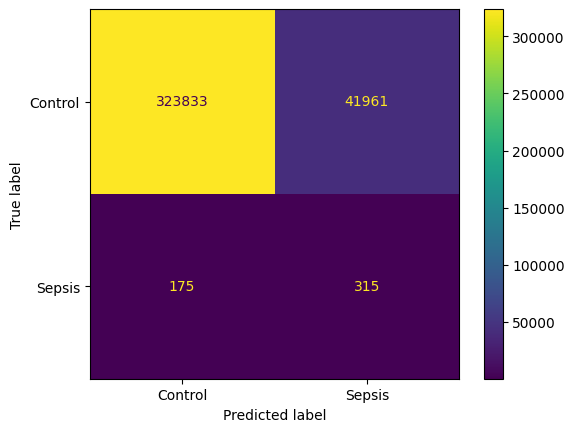

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(evaluation.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## XG Boost

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.054345  0.802730  0.450521   0.010598  0.874653  0.016223
1  Greifswald  0.032739  0.711921  0.418441   0.005312  0.812102  0.006751


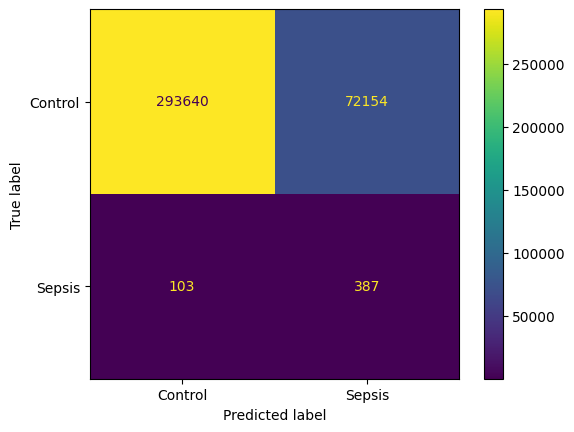

In [7]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 660,
                           n_estimators=478,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:267: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.057943  0.864897  0.470362   0.013240  0.867607  0.019855
1  Greifswald  0.035740  0.807226  0.449968   0.006681  0.815106  0.005915


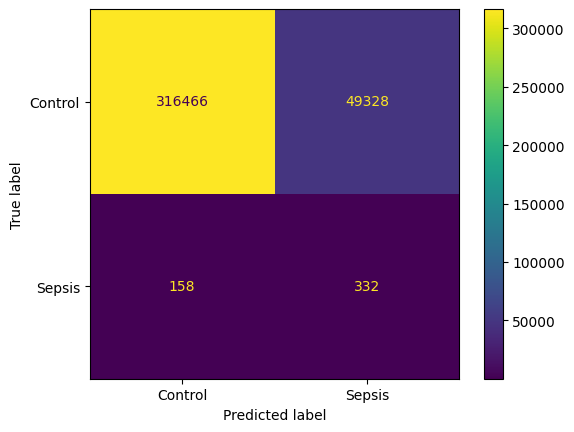

In [8]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)

## Feature variation

In [9]:
from dataAnalysis.FeatureImportance import FeatureImportance
feature_importance = FeatureImportance(X_train)

Ratio of diseased men/women over all CBCs for Logistic regression 42.1359171875	34.250071874999996


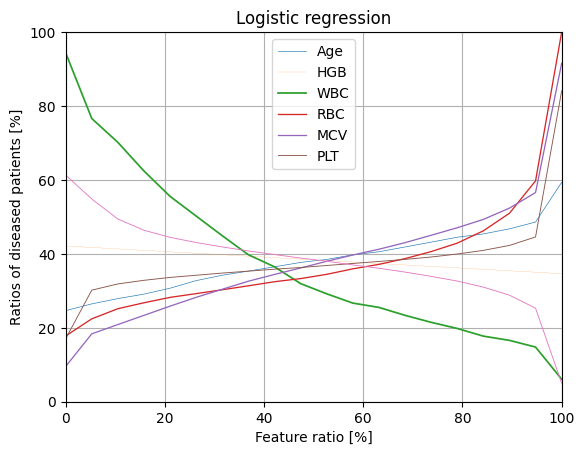

Ratio of diseased men/women over all CBCs for Decision tree 30.6701875	30.6701875


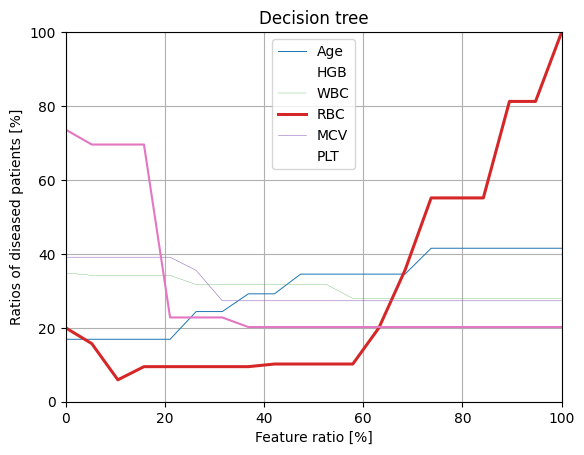

Ratio of diseased men/women over all CBCs for Random forest 16.9663828125	15.3475515625


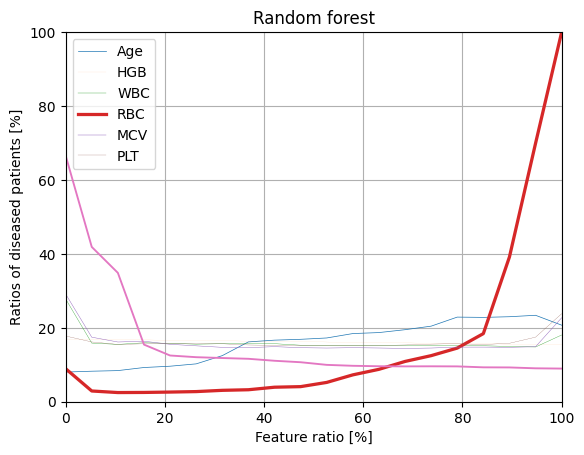

Ratio of diseased men/women over all CBCs for XGBoost 24.2523328125	19.2157484375


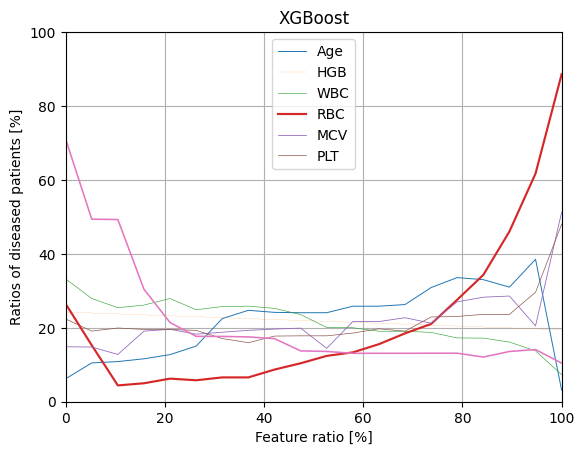

Ratio of diseased men/women over all CBCs for RUSBoost 22.4714078125	21.386048437499998


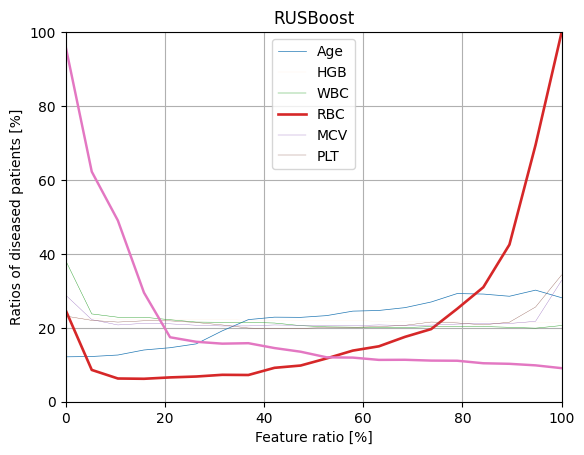

In [10]:
feature_importance.plot_feature_importance(logistic_regression, title = "Logistic regression")
feature_importance.plot_feature_importance(decision_tree, title="Decision tree")
feature_importance.plot_feature_importance(random_forest, title="Random forest")
feature_importance.plot_feature_importance(xgb_classifier, title="XGBoost")
feature_importance.plot_feature_importance(rus_boost, title="RUSBoost")

## Error evaluation

In [14]:
import time

def error_evaluation(model):
    global X_train, y_train, evaluation
    dfs = []
    times = []
    for i in range(100):
        start = time.time()
        model.fit(X_train, y_train)
        times.append(time.time() - start)
        dfs.append(evaluation.get_df_metrics(model))
    return dfs, times    

In [15]:
logistic_regression = LogisticRegression(solver="liblinear", class_weight="balanced")
dfs, times = error_evaluation(logistic_regression)
for t in times:
    print(t)
for df in dfs:
    print(df)

5.3351545333862305
5.2034571170806885
5.198295593261719
5.198157072067261
5.199398040771484
5.198184013366699
5.192248821258545
5.199862480163574
5.197952032089233
5.201237678527832
5.20203423500061
5.199284315109253
5.193682909011841
5.198350429534912
5.2040019035339355
5.197935581207275
5.201769113540649
5.203581809997559
5.199525594711304
5.199147939682007
5.195029973983765
5.1912572383880615
5.214892387390137
5.197969913482666
5.206568956375122
5.191415786743164
5.192980766296387
5.20180869102478
5.198912858963013
5.1985859870910645
5.198192358016968
5.199198961257935
5.201031923294067
5.197582006454468
5.210169553756714
5.205102920532227
5.195835828781128
5.210354566574097
5.202896595001221
5.1982598304748535
5.193665981292725
5.193332195281982
5.1974732875823975
5.199594020843506
5.190441846847534
5.19658350944519
5.203258752822876
5.193364143371582
5.201438665390015
5.195486307144165
5.198700428009033
5.199622392654419
5.207770824432373
5.195282697677612
5.193963527679443
5.1929

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(class_weight="balanced", max_features=6, min_samples_leaf=0.005,
                           min_samples_split=0.03)
dfs, times = error_evaluation(decision_tree)
for t in times:
    print(t)
for df in dfs:
    print(df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500)
dfs, times = error_evaluation(random_forest)
for t in times:
    print(t)
for df in dfs:
    print(df)

In [13]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 660,
                           n_estimators=478,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
dfs, times = error_evaluation(xgb_classifier)
for t in times:
    print(t)
for df in dfs:
    print(df)

0.6423811912536621
0.6259758472442627
0.6421804428100586
0.6322176456451416
0.658393383026123
0.6576194763183594
0.6335475444793701
0.6287000179290771
0.6996004581451416
0.6364350318908691
0.6844816207885742
0.6581699848175049
0.6660912036895752
0.6469907760620117
0.6329689025878906
0.6525442600250244
0.5922122001647949
0.5797359943389893
0.6795313358306885
0.58876633644104
0.6657671928405762
0.6348271369934082
0.6378722190856934
0.6455283164978027
0.6990456581115723
0.6530838012695312
0.6345760822296143
0.6686642169952393
0.6729826927185059
0.6794450283050537
0.6307308673858643
0.6380233764648438
0.6329250335693359
0.6291768550872803
0.6053426265716553
0.6514437198638916
0.657956600189209
0.6297197341918945
0.6302225589752197
0.6592206954956055
0.6341724395751953
0.6588296890258789
0.6431028842926025
0.6121420860290527
0.6156964302062988
0.6553807258605957
0.6482875347137451
0.5868103504180908
0.6459894180297852
0.640852689743042
0.6419990062713623
0.6075294017791748
0.649436473846435

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.054345  0.802730  0.450521   0.010598  0.874653  0.016223
1  Greifswald  0.032739  0.711921  0.418441   0.005312  0.812102  0.006751
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.054345  0.802730  0.450521   0.010598  0.874653  0.016223
1  Greifswald  0.032739  0.711921  0.418441   0.005312  0.812102  0.006751


In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495, sampling_strategy=35/65)
dfs, times = error_evaluation(rus_boost)
for t in times:
    print(t)
for df in dfs:
    print(df)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(model, param_grid):
    grid = GridSearchCV(
    n_jobs=-1,
    cv=10,
    estimator=model,
    scoring='roc_auc',
    refit='auroc',
    return_train_score=True,
    param_grid=param_grid,
    verbose= 10
    )
    grid.fit(X_train, y_train)
    return grid.best_estimator_
    

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'max_iter': [100, 1000, 10000],
    'class_weight': ["balanced", 35/65, 40/60, 45/55],
    "penalty":["l1", "l2", None, "elasticnet"],
    "solver":["liblinear", "saga", "newton-cholesky"]
}
logistic_regression = get_best_estimator(LogisticRegression(random_state=0), param_grid)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
                'class_weight': [{
                    0:i,
                    1: 1
                } for i in np.linspace(0.01, 0.01, 100)]
}
decision_tree = get_best_estimator(DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03), param_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={
                'class_weight': [{
                    0:i,
                    1: 1
                } for i in np.linspace(0.0024, 0.0026, 4)],
        'n_estimators': range(495, 595, 10)
    }
random_forest = get_best_estimator(RandomForestClassifier(max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42), param_grid)

In [ ]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [2],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [10],
    'scale_pos_weight': [663],
    "min_child_weight": [7],
    "max_delta_step": [6],
    'n_estimators': [440, 445, 450]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 1,
                                                        seed = 42), param_grid)

## Ensemble

In [ ]:
y_pred_log = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

##How much does the predictions match 
(y_pred_rf == y_pred_log).sum() / (corrected_predicted_rf.shape)

In [ ]:
from sklearn.ensemble import VotingClassifier as VC
eclf2 = VC(estimators=[ ('rf', random_forest), ('xgb', xgb_classifier), ('dt', decision_tree), ("lr", logistic_regression)],
        voting='soft',weights=[100, 100, 1, 1])
eclf2 = eclf2.fit(X_train, y_train)
get_df_metrics(eclf2)